In [126]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [84]:
pd.set_option('display.max_columns', None)

In [85]:
data = pd.read_csv("./customer_churn_data.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [86]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [88]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


## EDA

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\201166703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='viridis')


Text(0.5, 1.0, 'Churn Rate')

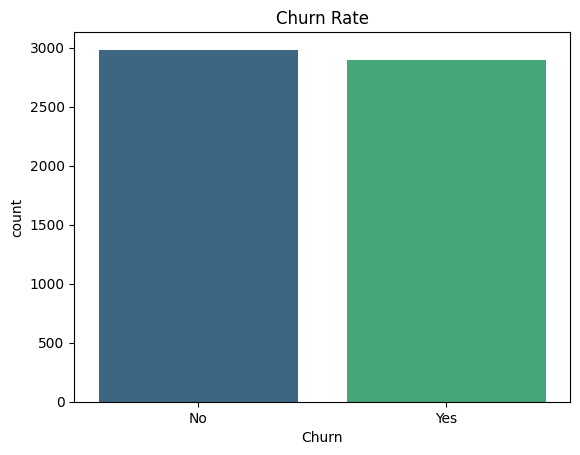

In [89]:
sns.countplot(data=data, x='Churn', palette='viridis')
plt.title("Churn Rate")

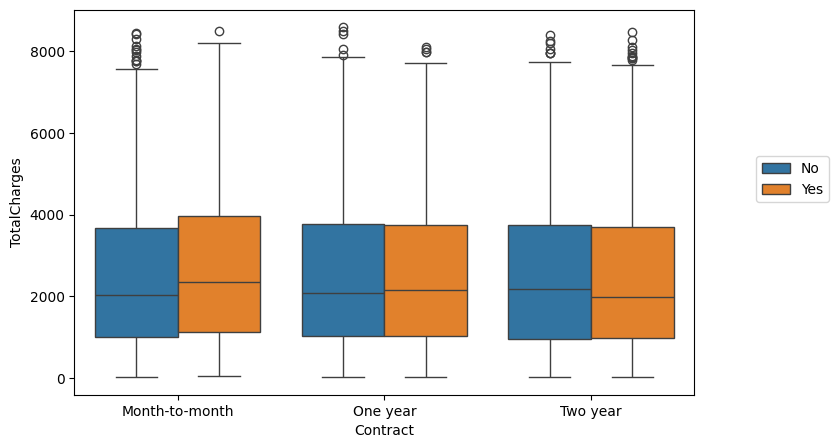

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x=data['Contract'], y=data['TotalCharges'], hue='Churn')
plt.legend(loc=[1.1, 0.5])

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\1453149028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=data['gender'], color='skyblue', palette='viridis')


Text(0.5, 1.0, 'Genders')

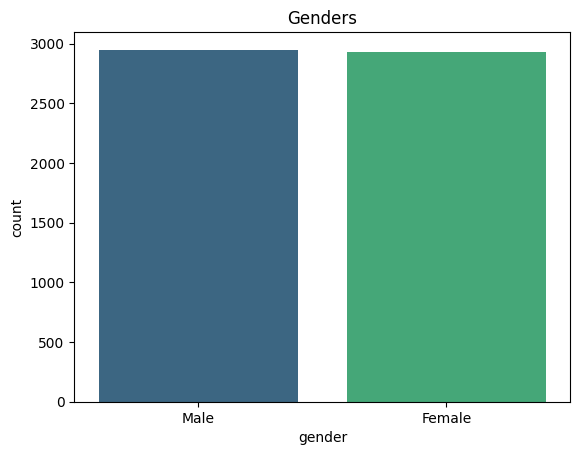

In [91]:
sns.countplot(data=data, x=data['gender'], color='skyblue', palette='viridis')
plt.title("Genders")

<Axes: xlabel='tenure', ylabel='Count'>

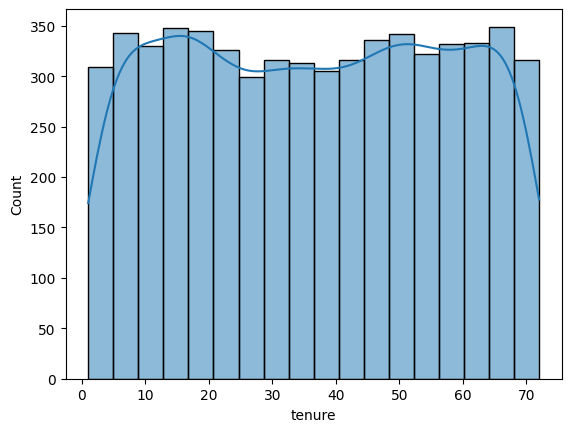

In [92]:
sns.histplot(data=data, x=data['tenure'], kde=True)

In [93]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


C:\Users\muham\AppData\Local\Temp\ipykernel_3752\2676280974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charger_wrt_gender.index, y=charger_wrt_gender.values, palette='dark')


Text(0.5, 1.0, 'Charges wrt to gender')

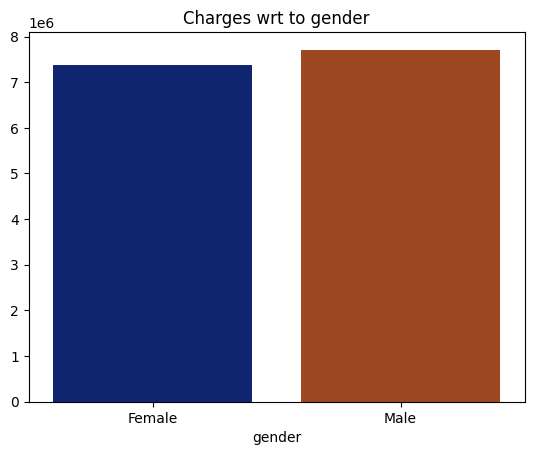

In [94]:
charger_wrt_gender = data.groupby('gender')['TotalCharges'].sum()
sns.barplot(x=charger_wrt_gender.index, y=charger_wrt_gender.values, palette='dark')
plt.title("Charges wrt to gender")

## Outliers

In [95]:
data_copy = data.copy()
data.shape

(5880, 21)

In [96]:
for i in data_copy.columns:
    if data_copy[i].dtype != 'object':
        z_score = (data_copy[i] - data_copy[i].mean())/data_copy[i].std()
        data_copy['z_score'] = z_score
        df = data_copy[((data_copy['z_score'] > -3) & (data_copy['z_score'] < 3))]

In [97]:
df.shape

(5872, 22)

In [98]:
df.drop(columns='customerID', inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\2751294263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='customerID', inplace=True)


In [99]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,z_score


In [100]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [101]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [102]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [103]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\347395757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tenure Cohort'] = df['tenure'].apply(cohort)


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

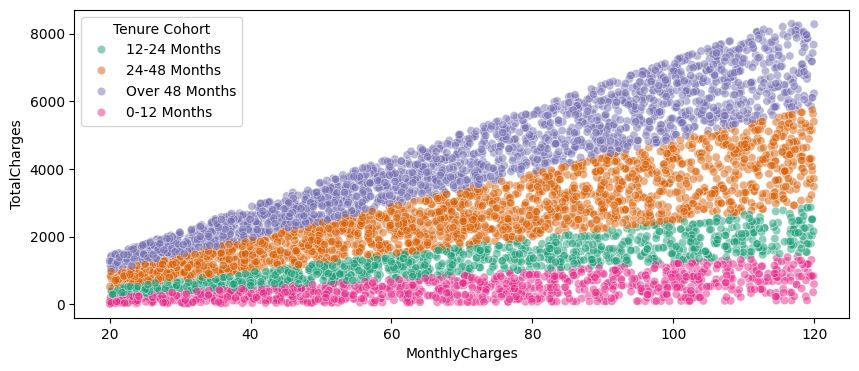

In [104]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['Tenure Cohort'], linewidth=0.5, alpha=0.5, palette='Dark2')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

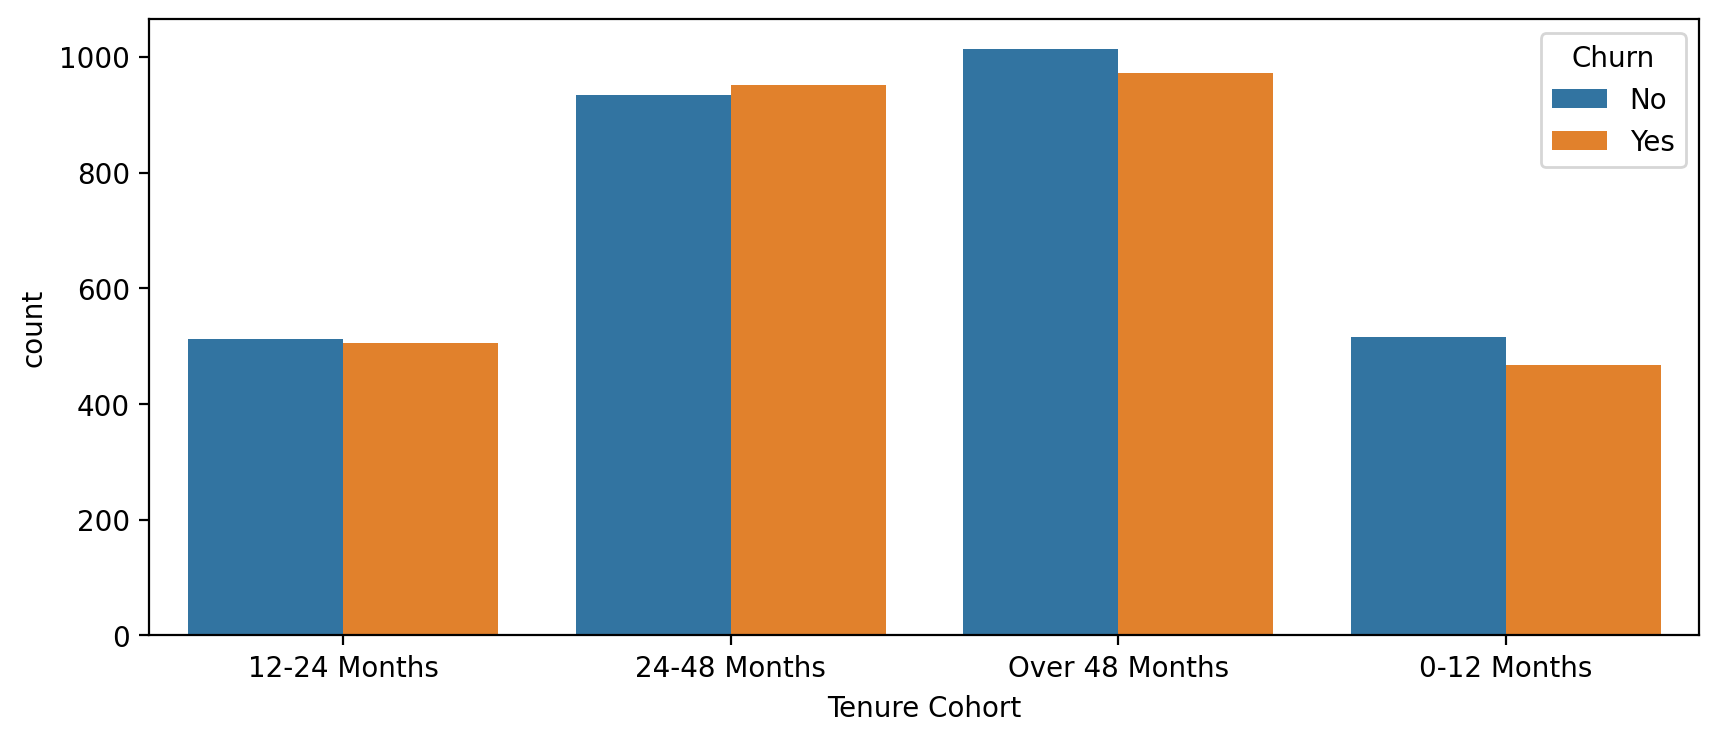

In [105]:
plt.figure(figsize=(10, 4), dpi=200)
sns.countplot(data=df, x=df['Tenure Cohort'], hue=df['Churn'])

<Figure size 2000x800 with 0 Axes>

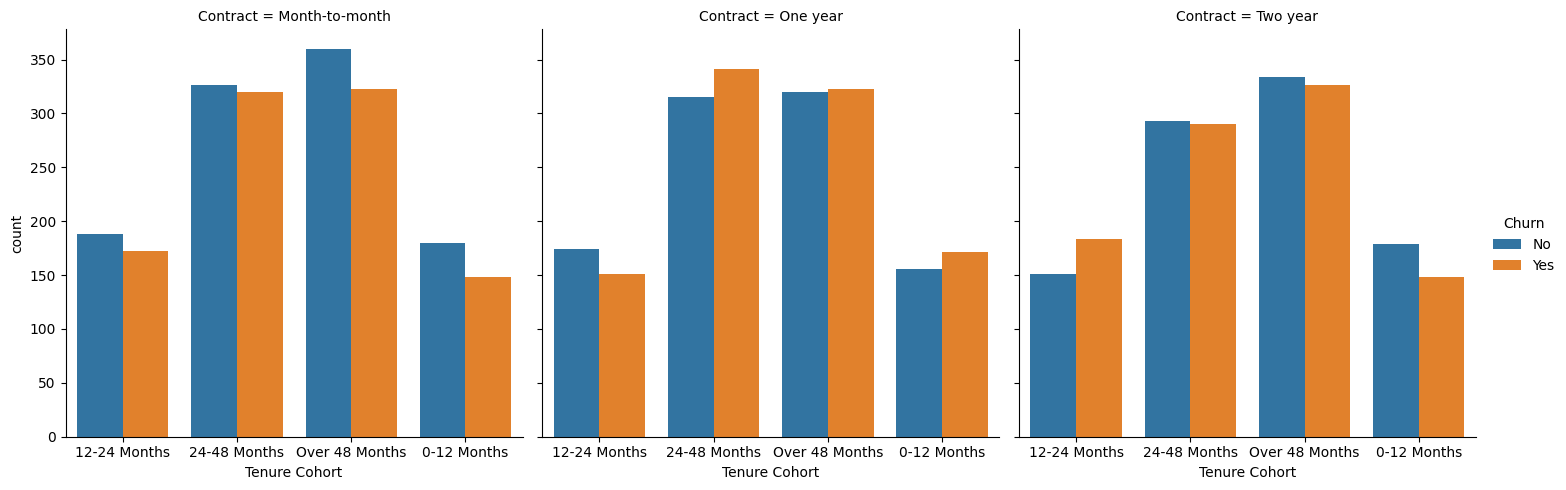

In [106]:
plt.figure(figsize=(10, 4), dpi=200)
sns.catplot(data=df, x=df['Tenure Cohort'], hue=df['Churn'], col=df['Contract'], kind='count')

## Modelling

In [107]:
df.drop(columns='Tenure Cohort', inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\3191844663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Tenure Cohort', inplace=True)


In [109]:
df.drop(columns='z_score', inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\71454927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='z_score', inplace=True)


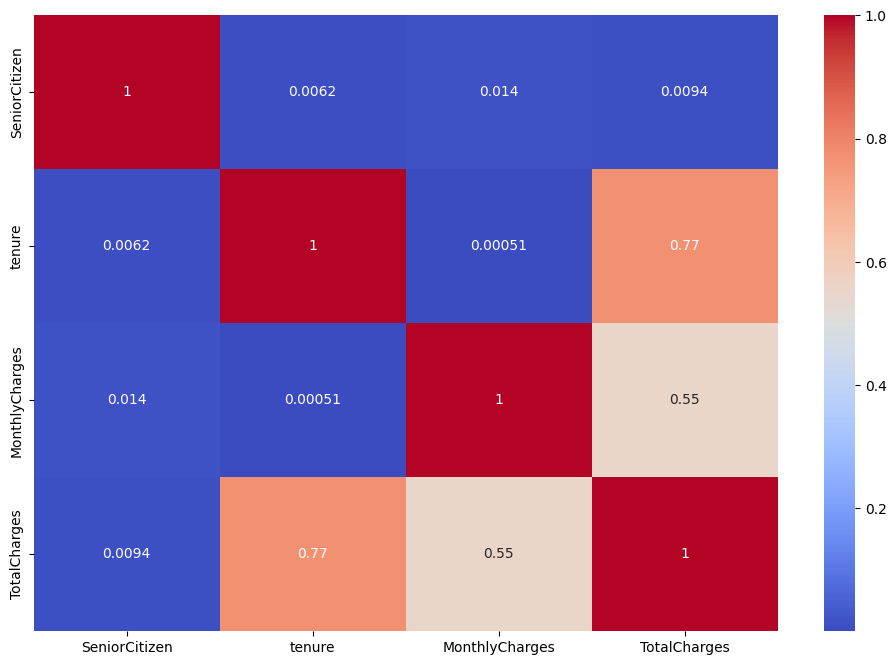

In [110]:
corr = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [111]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5872 non-null   object 
 1   SeniorCitizen     5872 non-null   int64  
 2   Partner           5872 non-null   object 
 3   Dependents        5872 non-null   object 
 4   tenure            5872 non-null   int64  
 5   PhoneService      5872 non-null   object 
 6   MultipleLines     5872 non-null   object 
 7   InternetService   5872 non-null   object 
 8   OnlineSecurity    5872 non-null   object 
 9   OnlineBackup      5872 non-null   object 
 10  DeviceProtection  5872 non-null   object 
 11  TechSupport       5872 non-null   object 
 12  StreamingTV       5872 non-null   object 
 13  StreamingMovies   5872 non-null   object 
 14  Contract          5872 non-null   object 
 15  PaperlessBilling  5872 non-null   object 
 16  PaymentMethod     5872 non-null   object 
 17  

In [114]:
for i in df.columns:
    if df[i].dtype == 'object':
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])

C:\Users\muham\AppData\Local\Temp\ipykernel_3752\569821382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\muham\AppData\Local\Temp\ipykernel_3752\569821382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\muham\AppData\Local\Temp\ipykernel_3752\569821382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [115]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,23,0,1,2,1,1,1,1,1,1,0,1,0,49.85,1146.55,0
1,0,0,1,0,43,0,1,0,2,0,2,0,2,0,0,0,3,100.70,4330.10,1
2,1,1,0,0,51,1,0,0,0,2,2,2,0,0,1,0,2,97.33,4963.83,1
3,1,1,0,0,72,1,2,0,2,0,2,0,0,0,0,0,1,101.38,7299.36,0
4,1,1,0,0,25,1,2,0,0,0,0,2,0,2,0,0,2,52.22,1305.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,1,0,1,1,71,1,0,0,2,0,0,2,0,0,0,1,3,74.21,5268.91,0
5876,1,0,0,0,22,1,2,0,0,0,2,2,0,2,1,0,3,65.43,1439.46,1
5877,0,0,0,0,68,0,1,1,2,0,2,2,2,0,1,1,0,59.78,4065.04,0
5878,0,0,1,1,14,0,1,1,2,2,2,2,2,2,0,1,3,91.88,1286.32,0


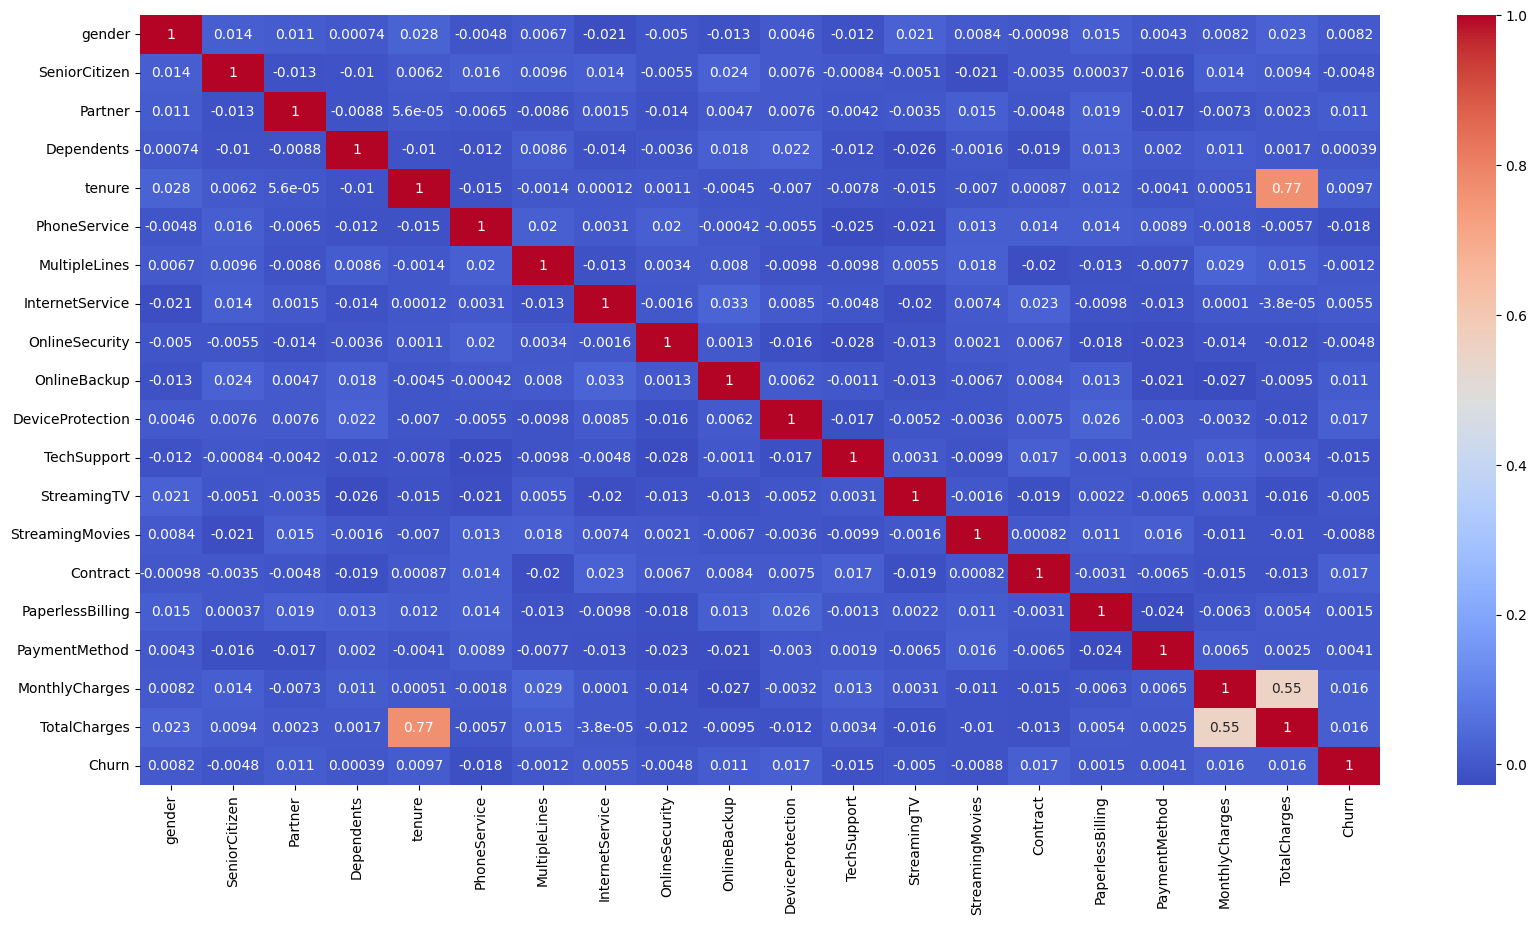

In [119]:
corr = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [122]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop(columns='Churn')
y = df['Churn']
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [124]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.48      0.65      0.55       722
           1       0.48      0.32      0.38       746

    accuracy                           0.48      1468
   macro avg       0.48      0.48      0.47      1468
weighted avg       0.48      0.48      0.47      1468



In [134]:
def evaluate_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(solver='liblinear'),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        # "Naive Bayes": GaussianNB(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        # "LightGBM": lgb.LGBMClassifier()
    }
    
    
    results = []

    
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    results_df = pd.DataFrame(results)

    return results_df


In [135]:
results = evaluate_models(X_transformed, y)

In [136]:
print(results)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.476731   0.475476  0.476731  0.465551
1     K-Nearest Neighbors  0.494325   0.494396  0.494325  0.494276
2           Decision Tree  0.490919   0.490983  0.490919  0.490882
3           Random Forest  0.494325   0.494610  0.494325  0.492278
4  Support Vector Machine  0.508513   0.509241  0.508513  0.505260
5       Gradient Boosting  0.484677   0.484769  0.484677  0.481905
6                 XGBoost  0.498297   0.498579  0.498297  0.497076
